# Experimenting with PyAF

In [1]:
from setup import start_spark, extract_data

spark = start_spark(sesh_name = 'Jupyter Sktime Modelling')
train, val = extract_data(spark)
spark.stop()

In [2]:
# add the pickup date time
train['pu_date'] = train.index
train.head()

,total_rides,total_takings,pu_date
pickup_date,,,
2013-08-01,307272,4.567414e+06,2013-08-01
2013-08-02,236761,3.534616e+06,2013-08-02
2013-08-03,226554,3.182267e+06,2013-08-03
2013-08-04,202310,3.073609e+06,2013-08-04
2013-08-05,406487,6.657713e+06,2013-08-05


In [3]:
import pyaf.ForecastEngine as autof

In [4]:
lEngine = autof.cForecastEngine()

In [5]:
lEngine.train(iInputDS=train, iTime='pu_date', iSignal='total_rides', iHorizon=30);

INFO:pyaf.std:START_TRAINING 'total_rides'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['total_rides']' 16.43537926673889


In [6]:
lEngine.getModelInfo() # => relative error 7% (MAPE)

INFO:pyaf.std:TIME_DETAIL TimeVariable='pu_date' TimeMin=2013-08-01T00:00:00.000000 TimeMax=2015-02-11T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=30
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='total_rides' Length=730  Min=150906 Max=638525  Mean=482654.3438356164 StdDev=60673.531454971315
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_total_rides' Min=150906 Max=638525  Mean=482654.3438356164 StdDev=60673.531454971315
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_total_rides_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR' [Lag1Trend + Seasonal_DayOfWeek + NoAR]
INFO:pyaf.std:TREND_DETAIL '_total_rides_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_total_rides_Lag1Trend_residue_Seasonal_DayOfWeek' [Seasonal_DayOfWeek]
INFO:pyaf.std:AUTOREG_DETAIL '_total_rides_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.0526 MAPE_Forecast=0.0356 MAPE_Test=0.0651
INFO:pyaf.std

In [8]:
df_forecast = lEngine.forecast(iInputDS=train, iHorizon=7)
# list the columns of the forecast dataset
print(df_forecast.columns)

INFO:pyaf.std:START_FORECASTING '['total_rides']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['total_rides']' 0.09282326698303223


Index(['pu_date', 'total_rides', 'row_number', 'pu_date_Normalized',
       '_total_rides', '_total_rides_Lag1Trend',
       '_total_rides_Lag1Trend_residue',
       '_total_rides_Lag1Trend_residue_Seasonal_DayOfWeek',
       '_total_rides_Lag1Trend_residue_Seasonal_DayOfWeek_residue',
       '_total_rides_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR',
       '_total_rides_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR_residue',
       '_total_rides_Trend', '_total_rides_Trend_residue',
       '_total_rides_Cycle', '_total_rides_Cycle_residue', '_total_rides_AR',
       '_total_rides_AR_residue', '_total_rides_TransformedForecast',
       'total_rides_Forecast', '_total_rides_TransformedResidue',
       'total_rides_Residue', 'total_rides_Forecast_Lower_Bound',
       'total_rides_Forecast_Upper_Bound', 'total_rides_Forecast_Quantile_5',
       'total_rides_Forecast_Quantile_14', 'total_rides_Forecast_Quantile_23',
       'total_rides_Forecast_Quantile_32', 'total_rides_Forecas

INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 1.6201863288879395


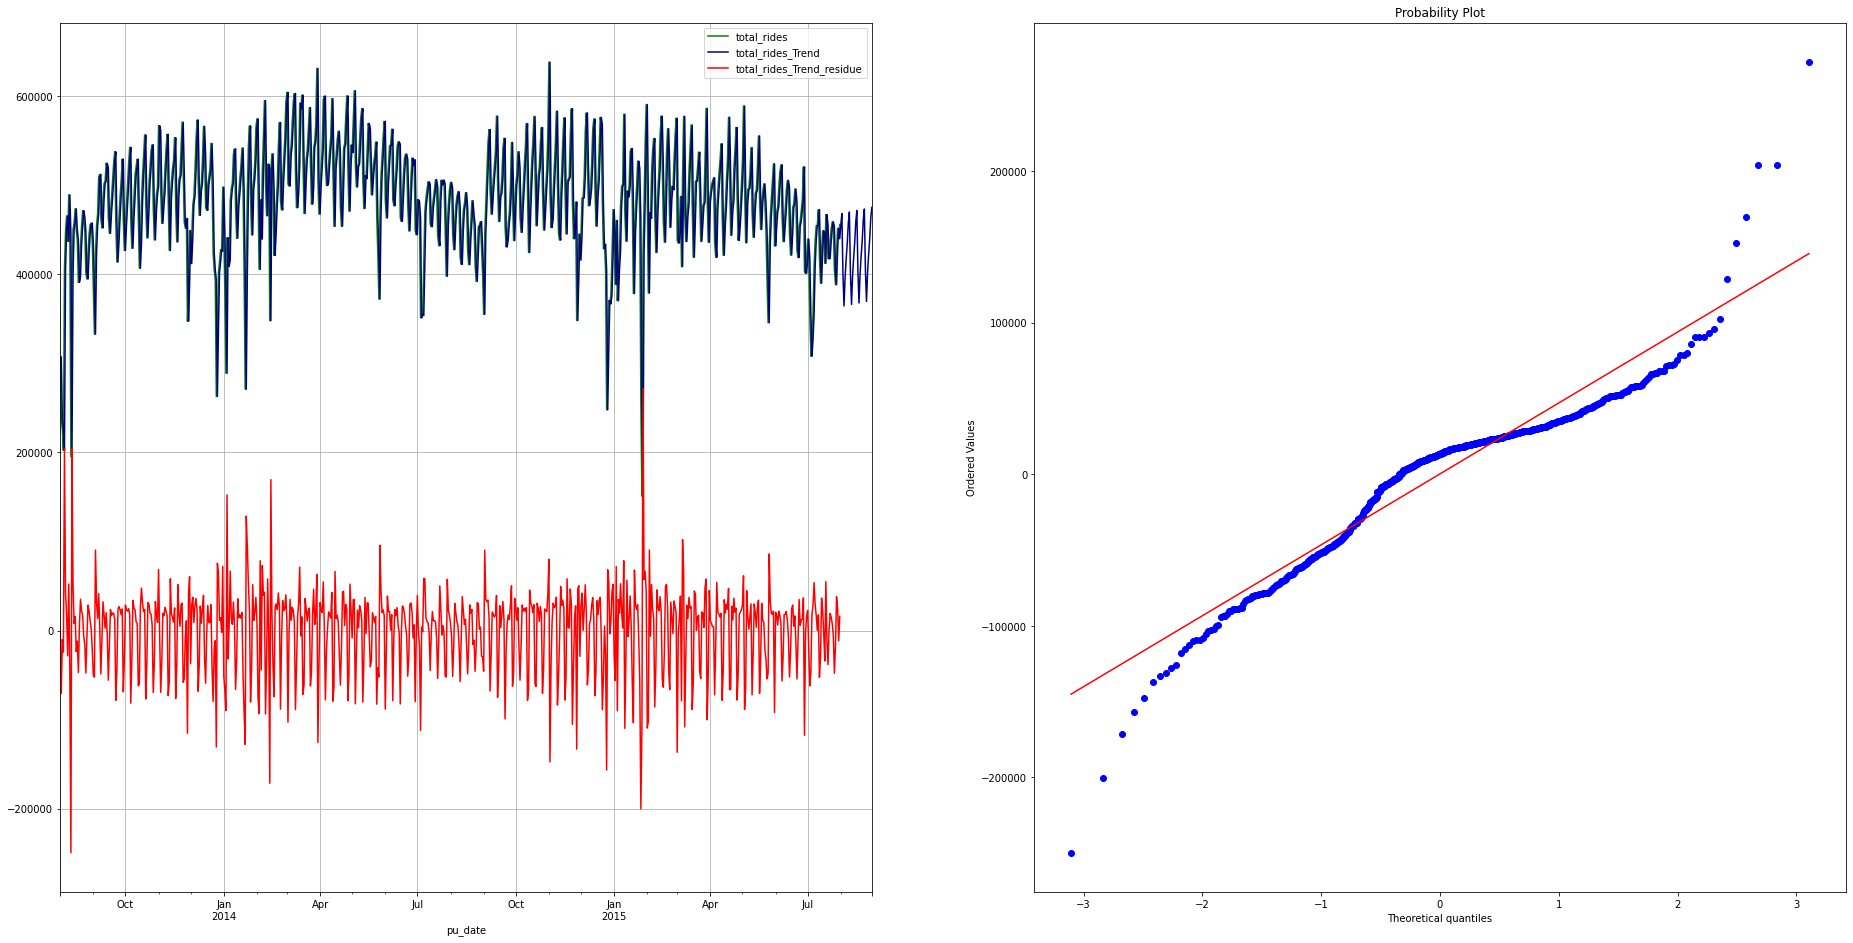

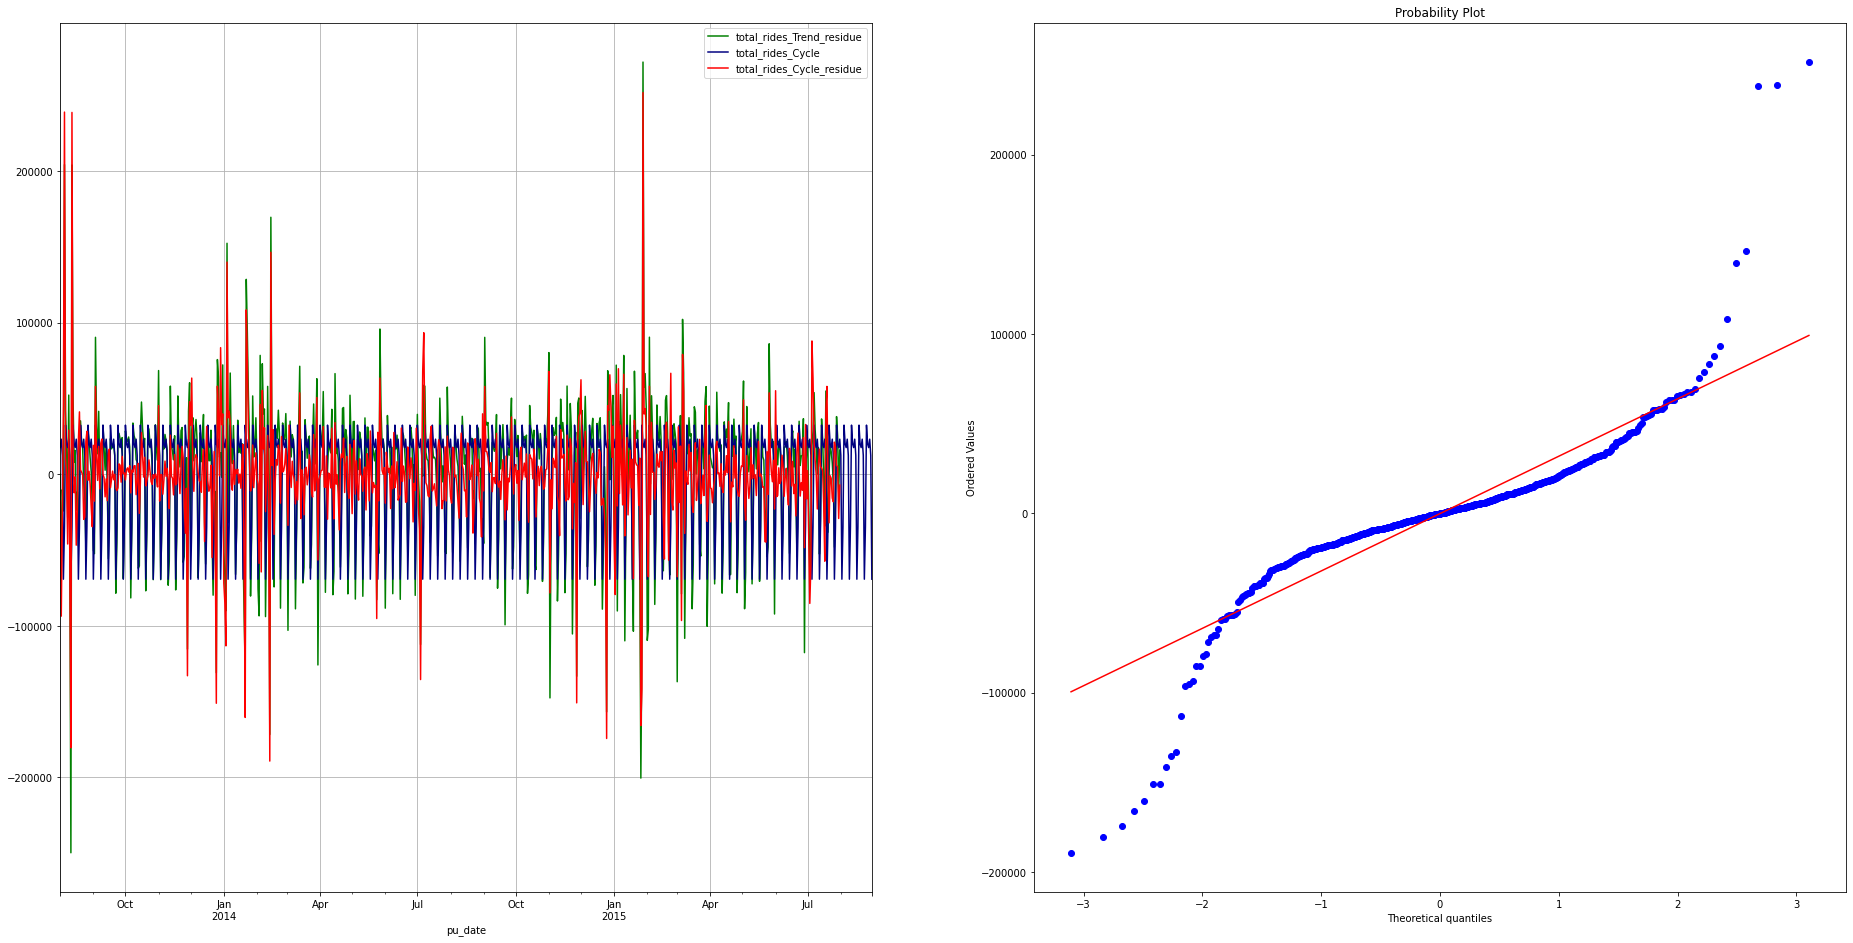

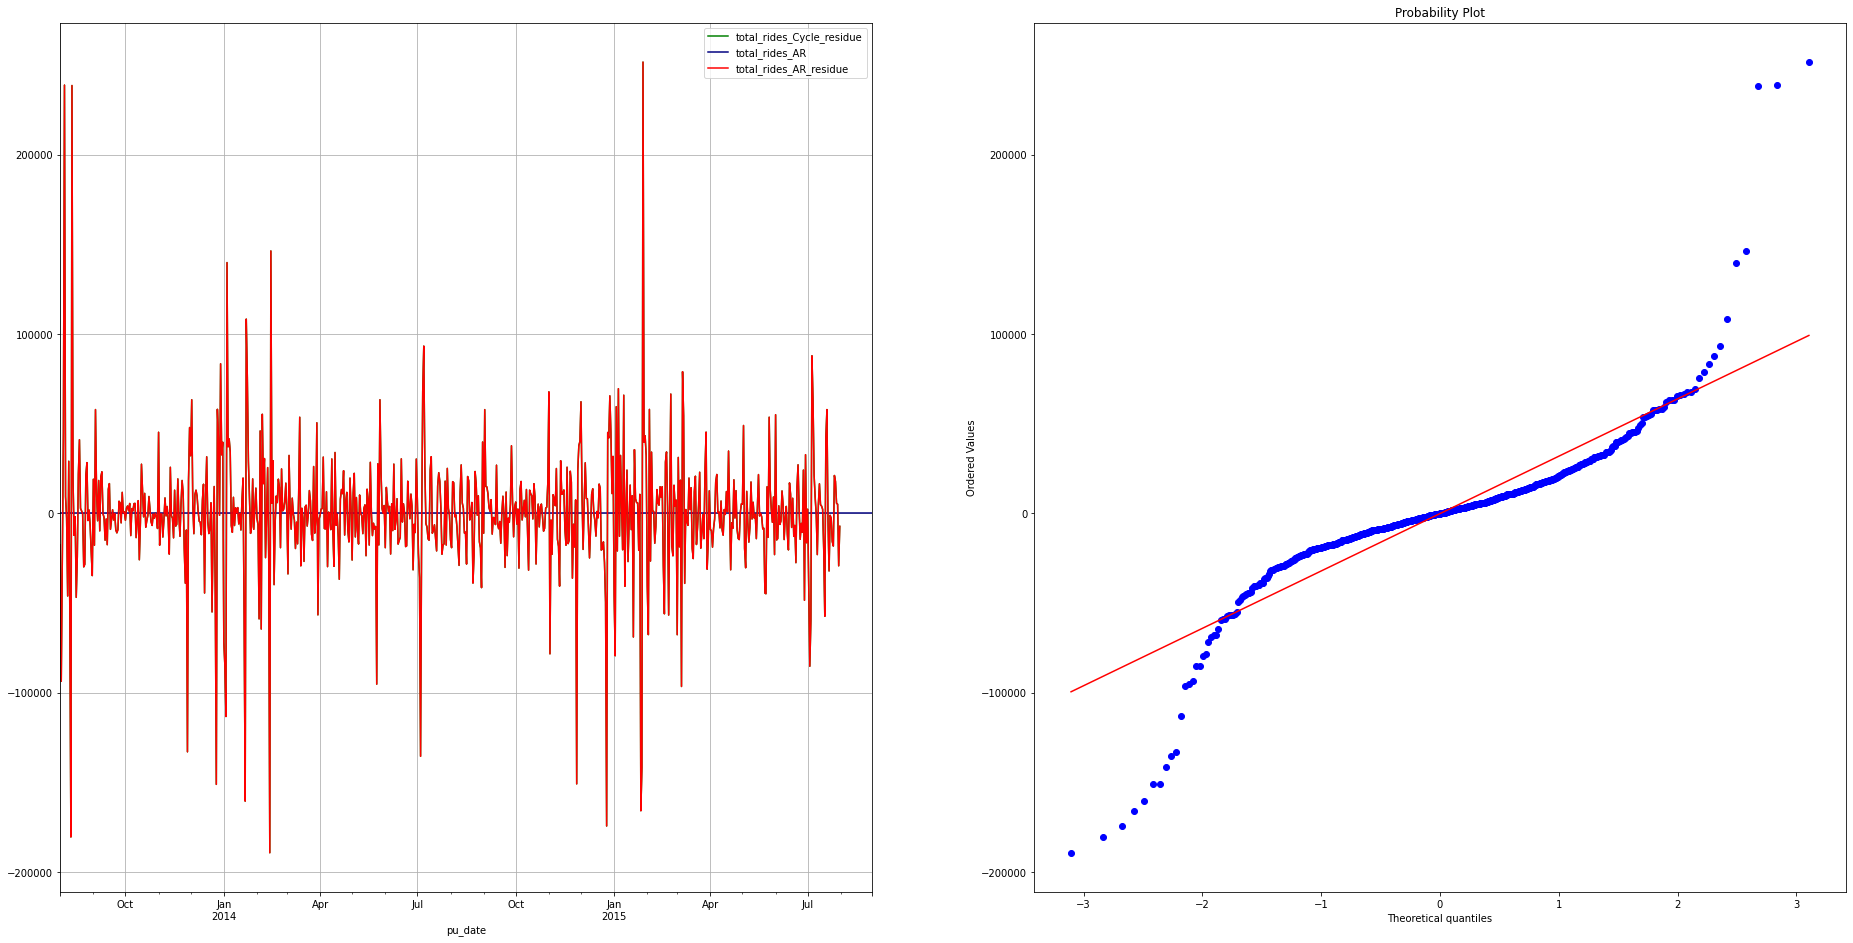

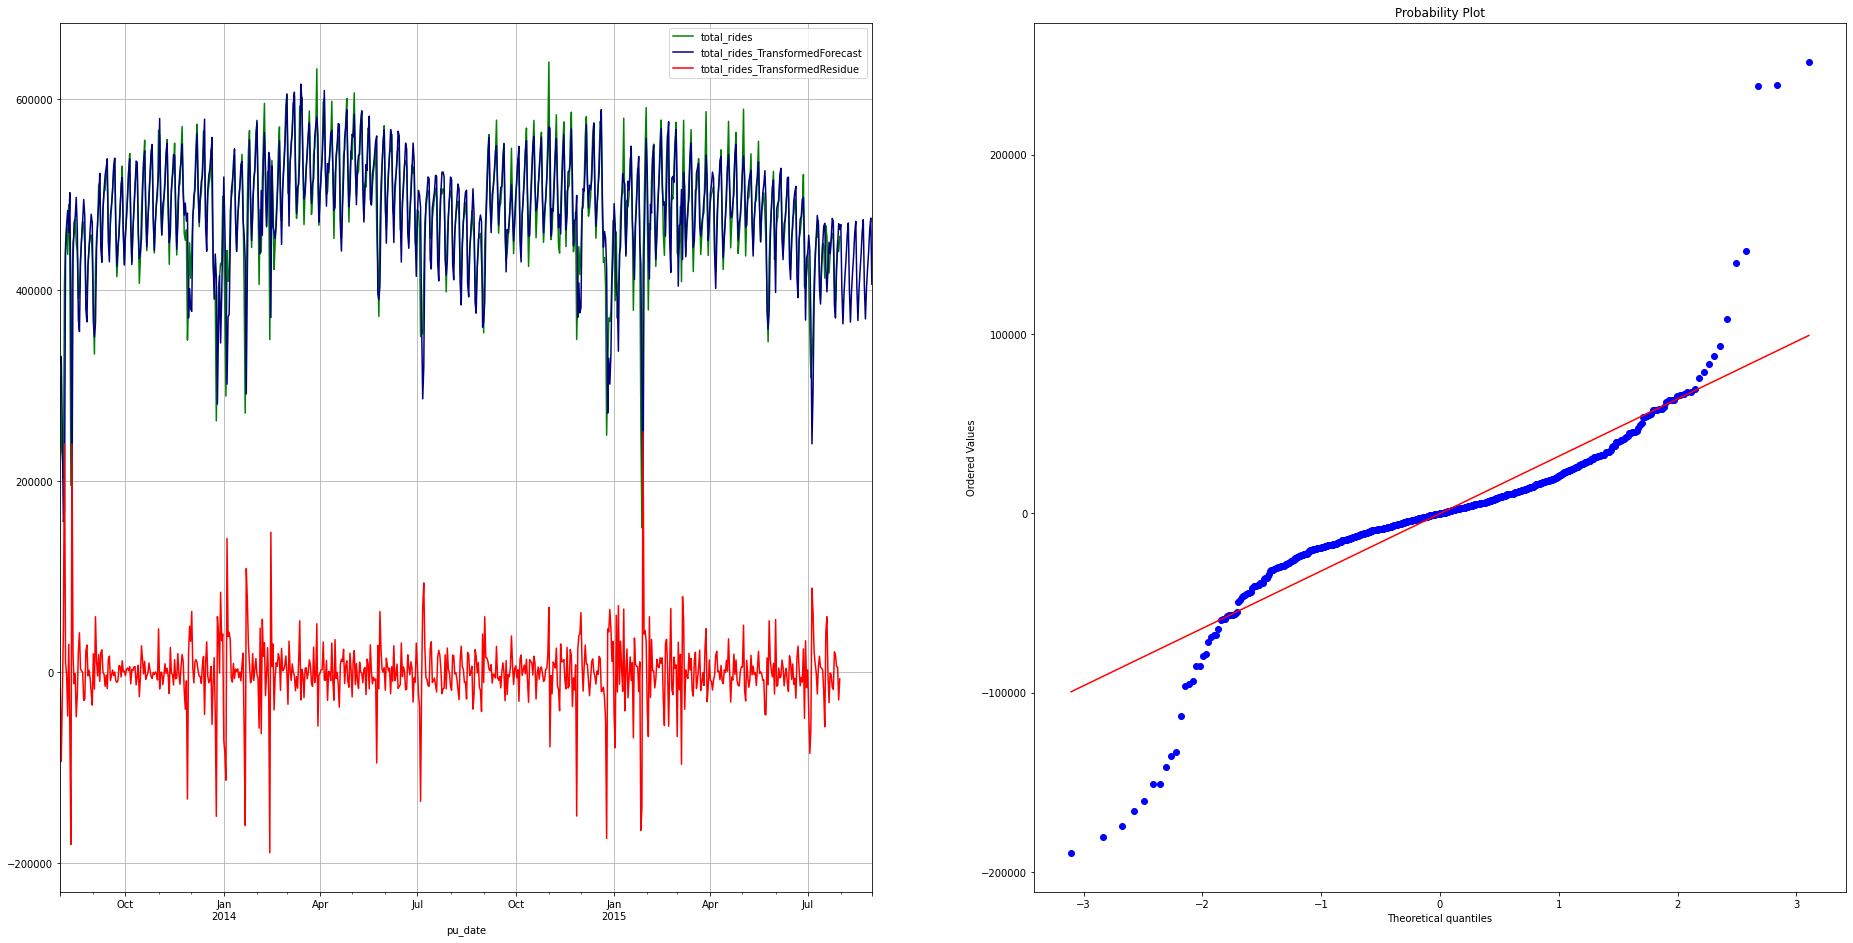

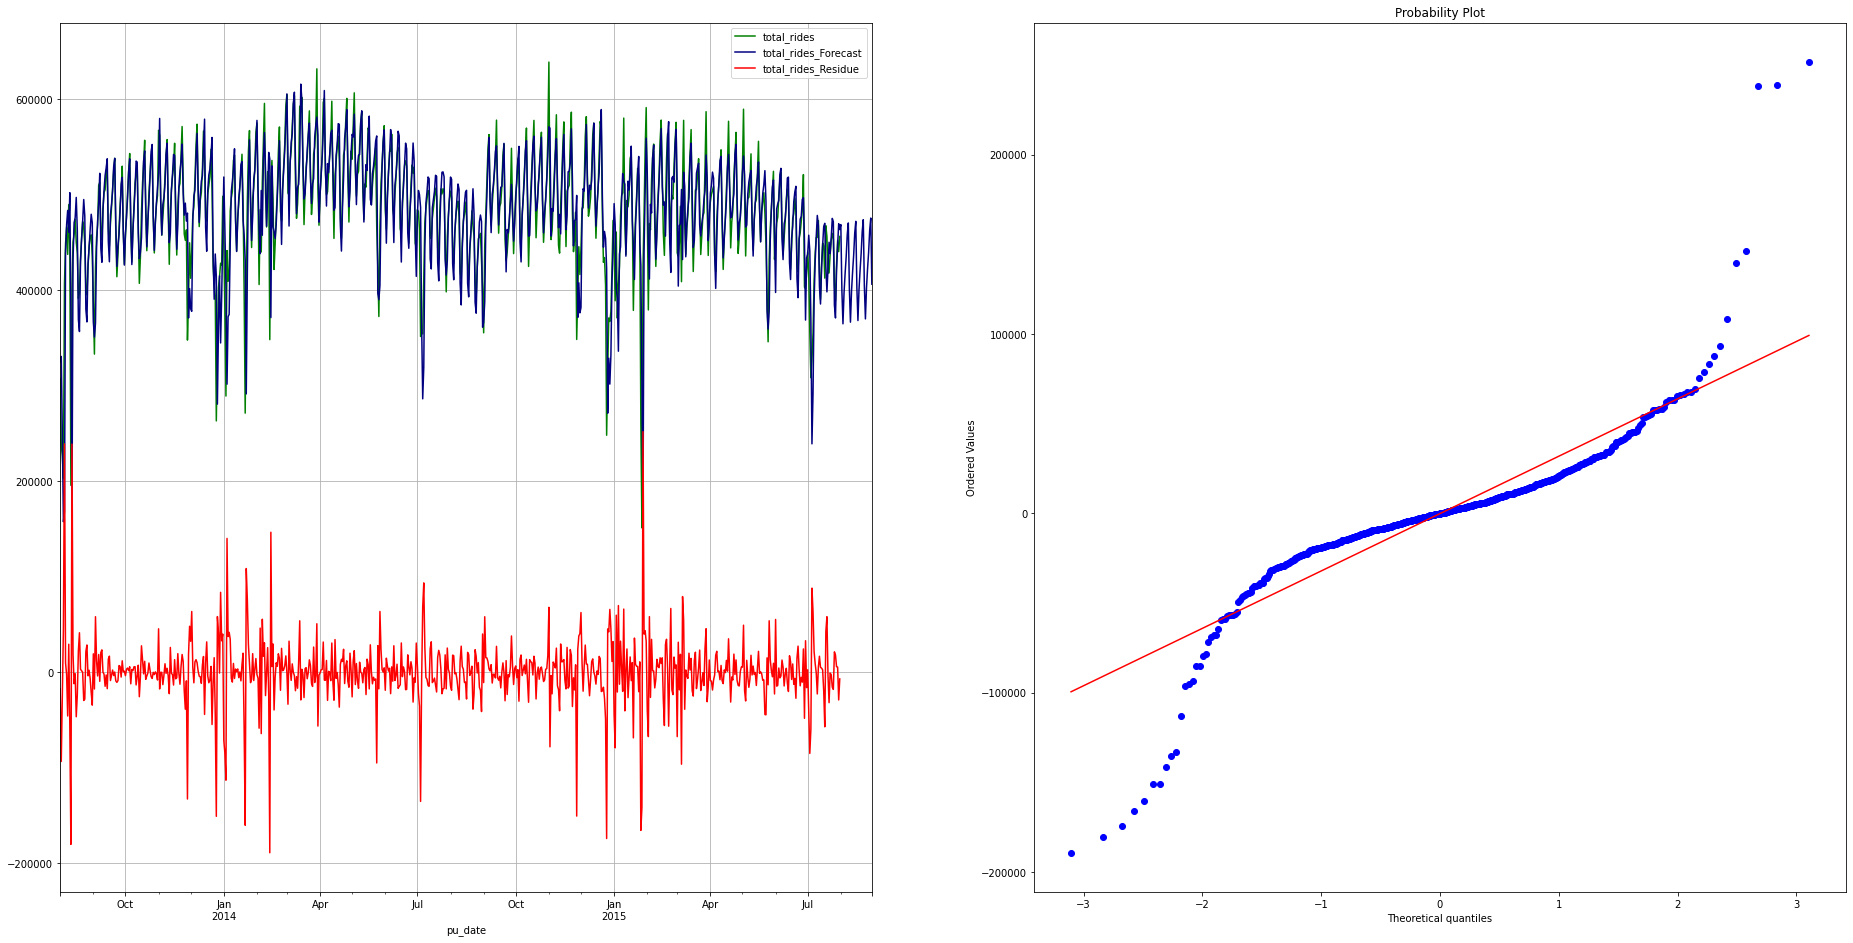

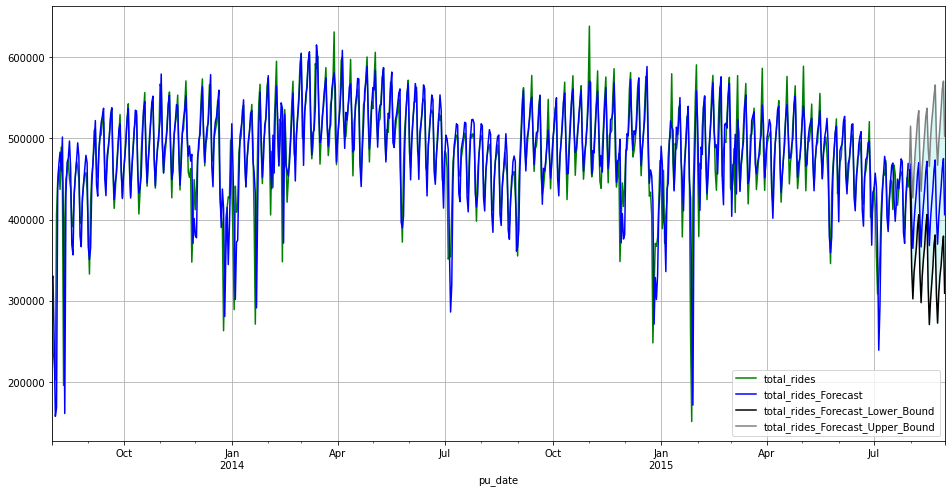

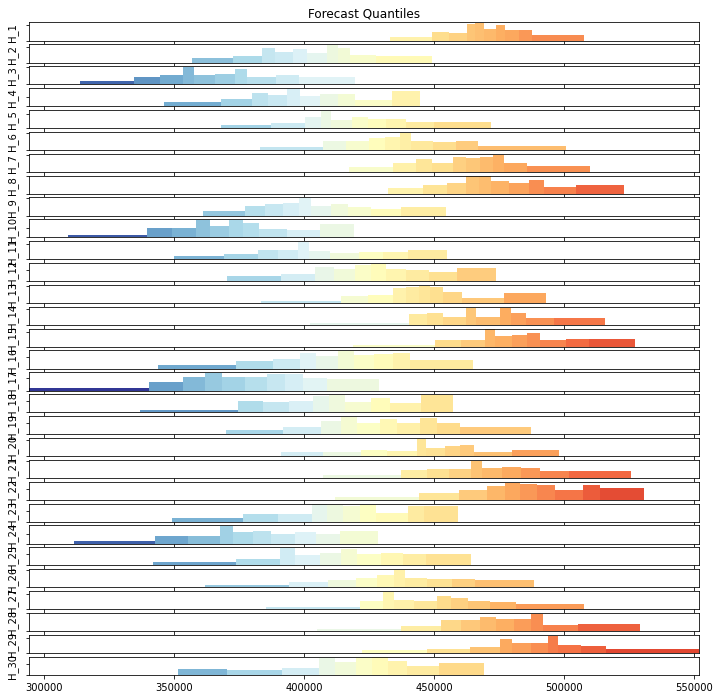

In [9]:
lEngine.standardPlots()

## Test Forecast

In [10]:
forecast_test = lEngine.forecast(train, 30);

INFO:pyaf.std:START_FORECASTING '['total_rides']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['total_rides']' 0.29493165016174316


In [11]:
forecast_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 34 columns):
 #   Column                                                                  Non-Null Count  Dtype         
---  ------                                                                  --------------  -----         
 0   pu_date                                                                 760 non-null    datetime64[ns]
 1   total_rides                                                             730 non-null    float64       
 2   row_number                                                              760 non-null    int64         
 3   pu_date_Normalized                                                      760 non-null    float64       
 4   _total_rides                                                            730 non-null    float64       
 5   _total_rides_Lag1Trend                                                  760 non-null    float64       
 6   _total_rides_Lag1Trend_res

In [13]:
forecast_test.describe()

,total_rides,row_number,pu_date_Normalized,_total_rides,_total_rides_Lag1Trend,_total_rides_Lag1Trend_residue,_total_rides_Lag1Trend_residue_Seasonal_DayOfWeek,_total_rides_Lag1Trend_residue_Seasonal_DayOfWeek_residue,_total_rides_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR,_total_rides_Lag1Trend_residue_Seasonal_DayOfWeek_residue_NoAR_residue,...,total_rides_Forecast_Quantile_14,total_rides_Forecast_Quantile_23,total_rides_Forecast_Quantile_32,total_rides_Forecast_Quantile_41,total_rides_Forecast_Quantile_50,total_rides_Forecast_Quantile_59,total_rides_Forecast_Quantile_68,total_rides_Forecast_Quantile_77,total_rides_Forecast_Quantile_86,total_rides_Forecast_Quantile_95
count,730.000000,760.000000,760.000000,730.000000,760.000000,730.000000,760.000000,730.000000,760.0,730.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,482654.343836,379.500000,0.678891,482654.343836,480190.813816,203.690411,221.944079,-95.821233,0.0,-95.821233,...,397026.040667,409120.080667,417664.454000,424321.490000,430556.183333,437054.431500,443805.912000,451628.257333,461818.776667,481868.688333
std,60715.131413,219.537392,0.392732,60715.131413,61252.782941,48663.410213,34769.639858,35787.254517,0.0,35787.254517,...,36735.330326,36237.463127,35994.368153,36054.856572,35369.135987,35108.223802,34547.008669,34037.705961,33967.838902,36557.669006
min,150906.000000,0.000000,0.000000,150906.000000,150906.000000,-249651.000000,-69240.500000,-189187.500000,0.0,-189187.500000,...,334435.520000,344576.680000,353171.960000,357650.835000,365544.500000,373172.350000,378119.600000,389146.390000,397830.460000,419270.750000
25%,450781.500000,189.750000,0.339445,450781.500000,448109.250000,-29215.250000,-34632.000000,-12017.000000,0.0,-12017.000000,...,372823.782500,384303.923750,392409.605000,399307.975000,404305.750000,411709.127500,422173.130000,431029.485000,440088.347500,455406.412500
50%,486061.500000,379.500000,0.678891,486061.500000,484151.500000,13559.500000,17545.500000,-39.750000,0.0,-39.750000,...,391268.725000,405345.807500,412813.810000,419809.907500,427261.500000,433432.862500,441882.920000,449373.310000,459392.115000,480537.462500
75%,521319.000000,569.250000,1.018336,521319.000000,519938.000000,27618.750000,23102.000000,12629.000000,0.0,12629.000000,...,436346.645000,446220.825000,452201.860000,460807.155000,465188.375000,472077.160000,476040.570000,481079.292500,487068.700000,509321.225000
max,638525.000000,759.000000,1.357782,638525.000000,638525.000000,271794.000000,32362.500000,251648.500000,0.0,251648.500000,...,450259.780000,463751.610000,475305.760000,480031.820000,487137.750000,493889.720000,497808.680000,507132.690000,516273.580000,551757.575000
